# Libraries

In [1]:
import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import optimizer_Factory as of

import Data.genData as genData

# Load Data

        0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
Node0   0.0  0.0  0.0  0.0  1.0  0.5  0.0  0.0  0.0  0.0  ...  1.0  0.5  0.0   
Node1   0.0  0.0  0.0  0.0  0.0  1.0  0.5  0.0  0.0  0.0  ...  0.0  1.0  0.5   
Node2   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.5  0.0  0.0  ...  0.0  0.0  1.0   
Node3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.5  0.0  ...  0.0  0.0  0.0   
Node4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.5  ...  0.0  0.0  0.0   
Node5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
Node6   1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.5  0.0  0.0   
Node7   0.0  1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.5  0.0   
Node8   0.0  0.0  1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.5   
Node9   0.0  0.0  0.0  1.0  0.5  0.0  0.0  0.0  0.0  0.0  ...  0.5  0.0  1.0   
Node10  1.0  0.5  0.0  1.0  0.5  1.0  0.5  0.0  1.0  0.5  ...  0.0  0.0  1.0   
Node11  0.0  1.0  0.5  0.0  1.0  0.5  1.

/home/alejandro/Documents/Repositories/NeuronsGraphConnectivity-1/custom_plots.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr.set_xticklabels(axarr.get_xticks(), rotation = 45)


<Figure size 640x480 with 0 Axes>

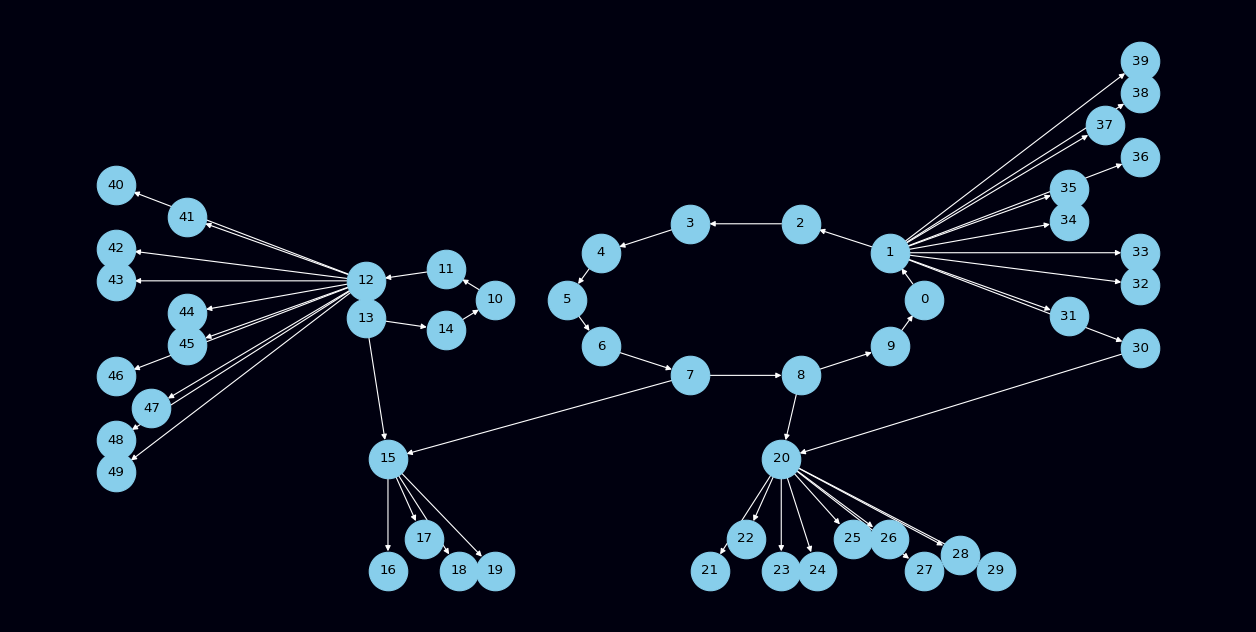

<Figure size 640x480 with 0 Axes>

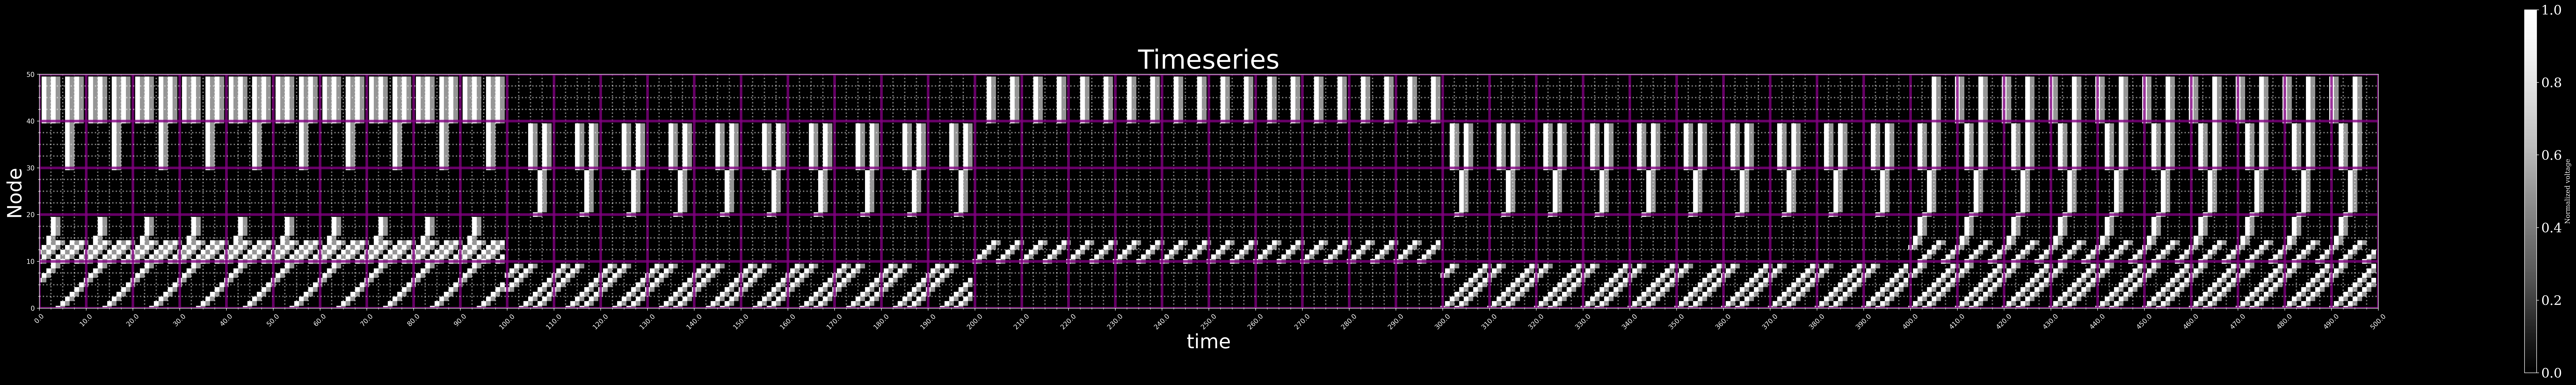

In [ ]:
timeseries, adj_GT, pos  = genData.genData()

In [ ]:
cfg = OmegaConf.load("config.yaml")
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)
print(OmegaConf.to_yaml(cfg))

seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.2
  train_size: 0.6
  val_size: 0.2
  num_workers: 2
loss: MSE
--ip: 127.0.0.1
--stdin: 9003
--control: 9001
--hb: 9000
--Session:
  signature_scheme: hmac-sha256
  key: b"fc52438e-3c7f-4263-90e1-64c380c28c2b"
--shell: 9002
--transport: tcp
--iopub: 9004
--f: /home/alejandro/.local/share/jupyter/runtime/kernel-v2-70838Tcm4FRHkOeL.json



In [ ]:
timeseries_rand= np.random.rand(10, 1000)
print(timeseries_rand.shape)
#print(timeseries.shape)



(10, 1000)


In [ ]:
window = 4
train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'pearson', window = window, overlap = 0.5)

X_train shape:  (10, 600)
X_val shape:  (10, 200)
X_test shape:  (10, 200)


In [ ]:

model = models.GNN(window, 1, 32)

model, train_losses, val_losses, accuracy_list  = train.train(model, train_loader, val_loader, 'GNNSimple')

Using device: cpu
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([190, 4])
torch.Size([190, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([30, 4])
torch.Size([30, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 32])
torch.Size([640, 4])
torch.Size([640, 

KeyboardInterrupt: 